## 학습 조기 종료 시키기

### 학습의 조기 종료 함수 - EarlyStopping()

#### 더 이상의 개선의 여지가 없을 때, 학습을 종료시키는 콜백함수
#### fit() 함수에서는 EarlyStopping() 콜백함수가 학습 과정 중에 매번 호출됨.

## EarlyStopping 지정 방법

```
early_stopping = EarlyStopping()
model.fit(X_train, Y_train, nb_epoch= 1000, callbacks=[early_stopping])
```

### CallBack 함수의 사용인자

```
keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')
```

* monitor : 관찰 항목
* min_delta : 개선되고 있다는 최소 변화량. 변화량이 적은 경우, 개선이 없음으로 판단.
* patience : 개선이 없다고 바로 종료하지 않고, 얼마나 기다려줄지 지정. 10번이라면 10번째 지속될 때, 학습 종료
* verbose : 얼마나 자세하게 정보를 볼지(0,1,2)
* mode : 관찰 항목에 대해 개선이 없다고 판단할 기준 지정. 
    * auto : 관찰하는 이름에 따라 자동 지정
    * min : 관찰하는 있는 항목이 감소되는 것을 멈출 때 종료
    * max : 관찰하고 있는 항목이 증가되는 것을 멈출 때 종료

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

Using TensorFlow backend.


In [4]:

np.random.seed(3)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### 조기 종료시키기

In [9]:
# 4. 모델 학습시키기
from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping() # 조기종료 콜백함수 정의
early_stopping = EarlyStopping(patience = 20) # 조기종료 콜백함수 정의
hist = model.fit(X_train, Y_train, epochs=3000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[early_stopping])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 163us/step - loss: 1.8294 - acc: 0.2286 - val_loss: 1.8820 - val_acc: 0.2033
Epoch 2/3000
700/700 [==============================] - 0s 154us/step - loss: 1.8256 - acc: 0.2457 - val_loss: 1.8786 - val_acc: 0.2033
Epoch 3/3000
700/700 [==============================] - 0s 147us/step - loss: 1.8216 - acc: 0.2400 - val_loss: 1.8710 - val_acc: 0.1733
Epoch 4/3000
700/700 [==============================] - 0s 152us/step - loss: 1.8178 - acc: 0.2314 - val_loss: 1.8671 - val_acc: 0.1867
Epoch 5/3000
700/700 [==============================] - 0s 138us/step - loss: 1.8147 - acc: 0.2400 - val_loss: 1.8660 - val_acc: 0.1800
Epoch 6/3000
700/700 [==============================] - 0s 132us/step - loss: 1.8107 - acc: 0.2443 - val_loss: 1.8652 - val_acc: 0.1933
Epoch 7/3000
700/700 [==============================] - 0s 117us/step - loss: 1.8080 - acc: 0.2457 - val_loss: 1.8610 - val_acc: 0.1900
Ep

700/700 [==============================] - 0s 131us/step - loss: 1.6954 - acc: 0.2986 - val_loss: 1.8155 - val_acc: 0.2200
Epoch 61/3000
700/700 [==============================] - 0s 142us/step - loss: 1.6942 - acc: 0.3086 - val_loss: 1.8181 - val_acc: 0.2500
Epoch 62/3000
700/700 [==============================] - 0s 145us/step - loss: 1.6927 - acc: 0.3057 - val_loss: 1.8134 - val_acc: 0.2167
Epoch 63/3000
700/700 [==============================] - 0s 142us/step - loss: 1.6918 - acc: 0.3014 - val_loss: 1.8134 - val_acc: 0.2333
Epoch 64/3000
700/700 [==============================] - 0s 127us/step - loss: 1.6908 - acc: 0.3143 - val_loss: 1.8201 - val_acc: 0.2367
Epoch 65/3000
700/700 [==============================] - 0s 126us/step - loss: 1.6876 - acc: 0.3057 - val_loss: 1.8174 - val_acc: 0.2767
Epoch 66/3000
700/700 [==============================] - 0s 147us/step - loss: 1.6861 - acc: 0.3100 - val_loss: 1.8079 - val_acc: 0.2600
Epoch 67/3000
700/700 [==============================] 

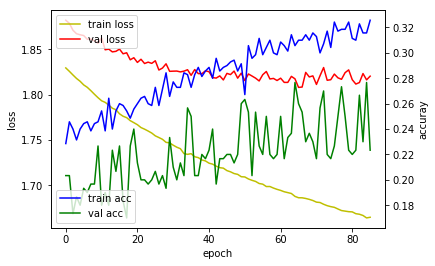

In [10]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [11]:
# 6. 모델 평가하기

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

10000/10000 [==============================] - 0s 15us/step

loss : 1.838831558227539
accuray : 0.2665
